## Задача
Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

А также ответить на ключевые вопросы HR-агентства:

Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

## Загрузка данных

In [261]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# читаем файл
data = pd.read_csv('/Users/arturboldacev/SF_Data_Science/EDA_1/data/ds_salaries.csv')
df = data 

# добавляем уровень значимости
alpha = 0.05

## Описательный анализ данных

In [262]:
# Проверяем датасет на пропущенные значения
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

В датасете 607 значений. В данных нет пустых значений. 

In [263]:
# Выводим кол-во дубликатов
print(f'кол-во дубликатов в данных {data[data.duplicated()].shape[0]}')

# Удаляем дубликаты и выводми количество строк
data = data.drop_duplicates()
print(f'кол-во данных без дубликатов: {data.shape[0]}')

кол-во дубликатов в данных 0
кол-во данных без дубликатов: 607


In [264]:
# Определение и удаление неинформативных признаков

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in data.columns:
    #наибольшая относительная частота в признаке
    top_freq = data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = data[col].nunique() / data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
        data = data.drop(col, axis = 1)
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        data = data.drop(col, axis = 1)
print(f'Результирующее число признаков: {data.shape[1]}')

Unnamed: 0: 100.0% уникальных значений
employment_type: 96.87% одинаковых значений
Результирующее число признаков: 10


## Распределение 

[Text(0.5, 0, 'зарплата в долларах')]

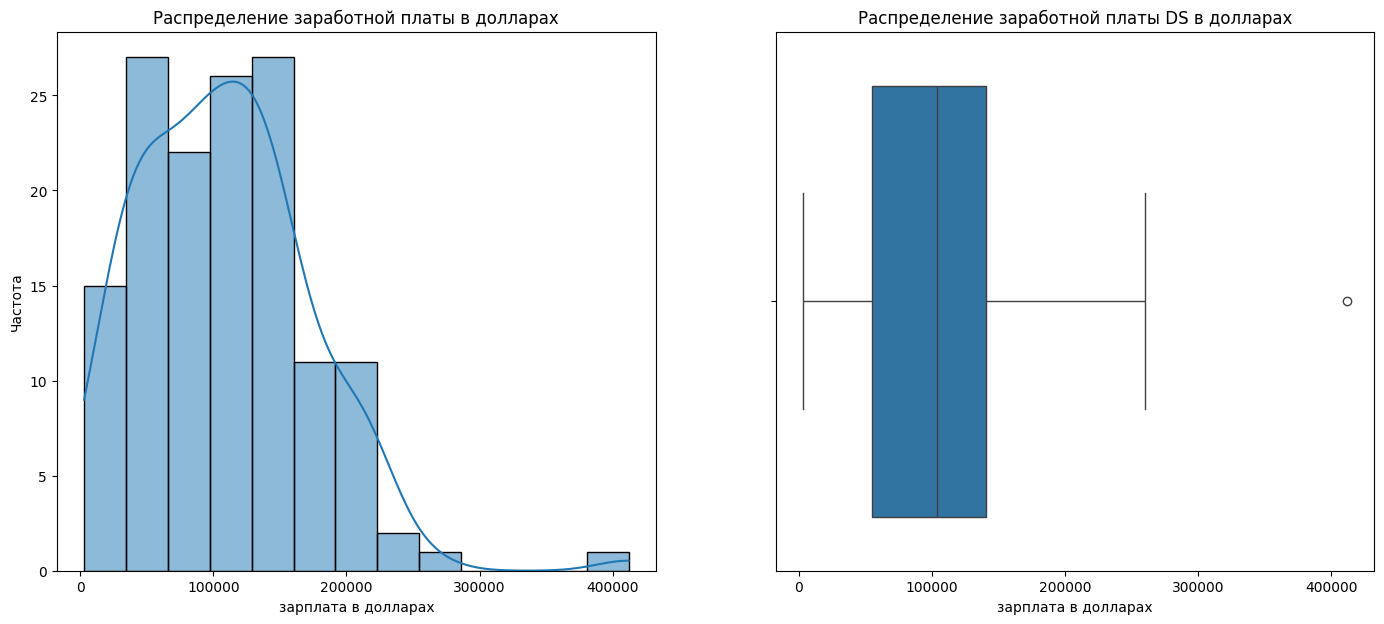

In [265]:
# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

# Строим фигуру с двумя осями
fig, axes = plt.subplots(1,2, figsize = (17,7))

# Заполняем ось гистограммой
axes[0] = sns.histplot(data_sc['salary_in_usd'],kde = True,ax = axes[0])
axes[0].set_title('Распределение заработной платы в долларах')
axes[0].set(xlabel='зарплата в долларах', ylabel='Частота')

# Заполянем вторую ось коробчатой диаграммой
axes[1]= sns.boxplot(data_sc['salary_in_usd'], ax = axes[1], orient='h')
axes[1].set_title('Распределение заработной платы DS в долларах')
axes[1].set(xlabel='зарплата в долларах')

In [266]:
# Проводим описательную статистику
data_salary = data['salary_in_usd'].describe().round().to_frame()
data_salary

,salary_in_usd
count,607.0
mean,112298.0
std,70957.0
min,2859.0
25%,62726.0
50%,101570.0
75%,150000.0
max,600000.0


В данных есть выбросы, так как гистограмма отлична от нормальной

## Распределение зарплаты в зависимости от опыта работы

[Text(0.5, 0, 'ЗП в долларах'), Text(0, 0.5, 'Опыт работы')]

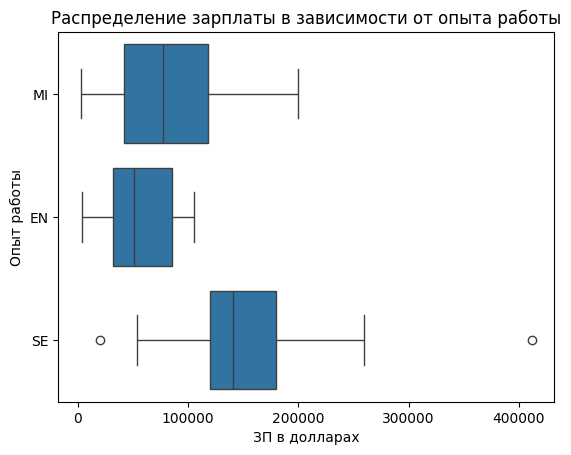

In [267]:
# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

# Строим коробчатую диаграмму
figure = sns.boxplot(data_sc, x = 'salary_in_usd', y = 'experience_level')
figure.set_title('Распределение зарплаты в зависимости от опыта работы')
figure.set(xlabel= 'ЗП в долларах', ylabel = 'Опыт работы')

ЗП на разных уровнях опыта работы отличатся, следовательно


                опыт работы влияет на ЗП дата сайнтиста

важно отметить, что руководителей DS нет                

## Распределение зарплаты в зависимости от объема работы выполняемой удаленно

[Text(0.5, 0, 'ЗП в долларах'),
 Text(0, 0.5, 'Объем работы выполняемая удаленно')]

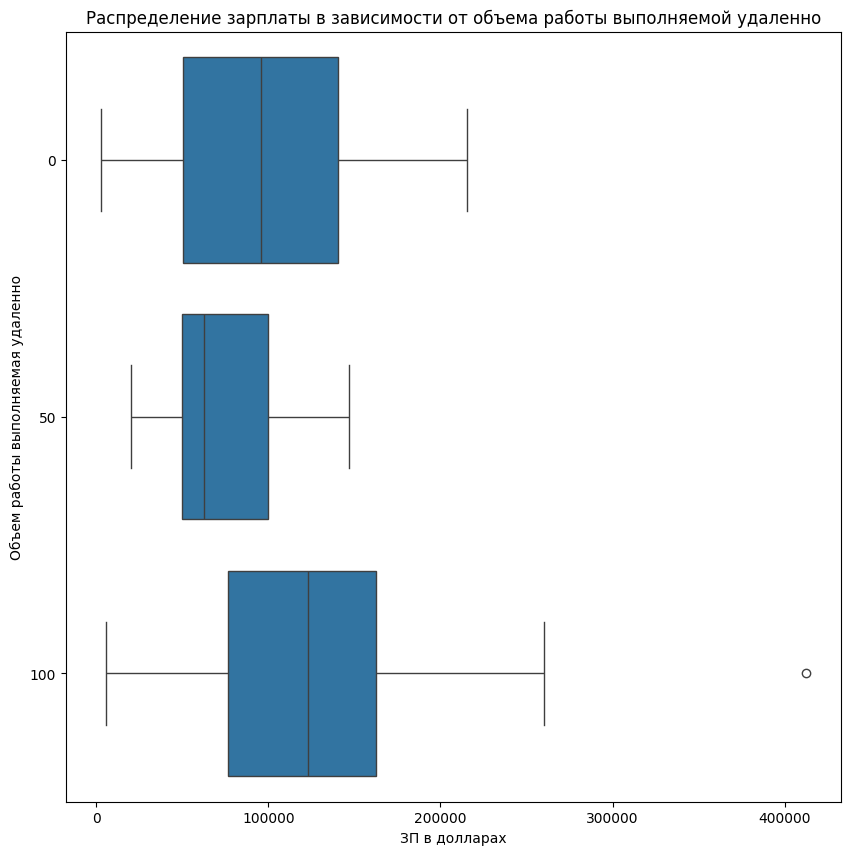

In [268]:
# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

# Строим коробчатую диаграмму
fig = plt.figure(figsize=(10,10))
figure = sns.boxplot(data_sc, x = 'salary_in_usd', y = 'remote_ratio', orient='h')
figure.set_title('Распределение зарплаты в зависимости от объема работы выполняемой удаленно')
figure.set(xlabel= 'ЗП в долларах', ylabel = 'Объем работы выполняемая удаленно')

Удивительно, но удаленная работа оплачивается больше, чем работа оффлайн, и в особенности чем частично удаленная работа. Возможно это связано с тем , что сильные спецалисты предпочитают свое пространство, или рынок труда привлекает иностранные умы. Возможно иностранные умы привлекают большим опытом работы и новым взглядом на работу.

Объем работы выполняемый удаленно влияет на зп дата-сайнтиста 

## Распределение зарплаты в зависимости от размера компании

[Text(0.5, 0, 'ЗП в долларах'), Text(0, 0.5, 'Размер компании')]

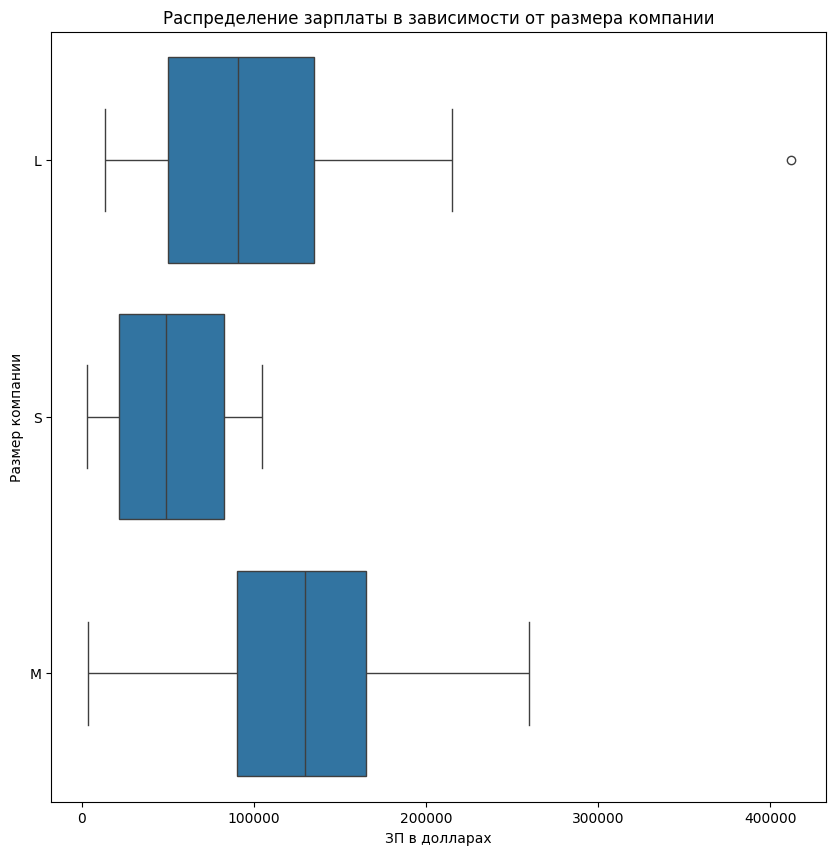

In [269]:
# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

# Строим коробчатую диаграмму
fig = plt.figure(figsize=(10,10))
figure = sns.boxplot(data_sc, x = 'salary_in_usd', y = 'company_size', orient='h')
figure.set_title('Распределение зарплаты в зависимости от размера компании')
figure.set(xlabel= 'ЗП в долларах', ylabel = 'Размер компании')

Между компанией большой и средней не наблюдается существенной разницы. Однако маленькие компании платят меньше , следовательно это тоже влияет на зп дата-сайнтиста

## Отношение ЗП дата-сайнтиста и года оплачиваемой зарплаты

[Text(0.5, 0, 'ЗП в долларах'), Text(0, 0.5, 'Год оплачиваемой ЗП')]

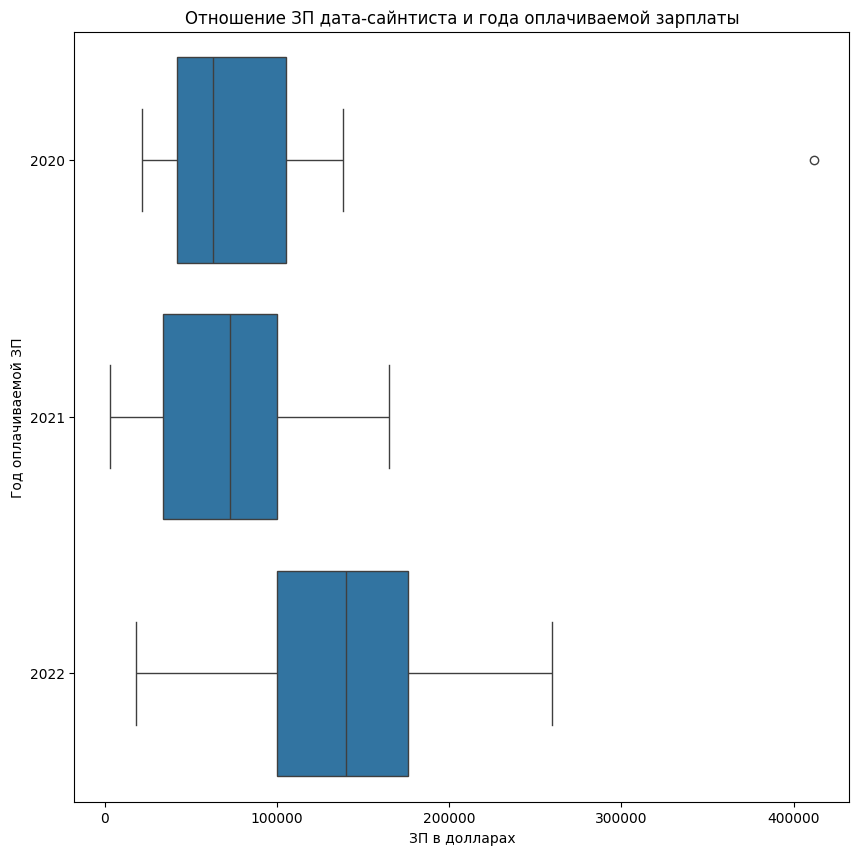

In [270]:
# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

# Строим диаграмму
fig = plt.figure(figsize=(10,10))
figure = sns.boxplot(data_sc, x = 'salary_in_usd', y = 'work_year', orient= 'h')
figure.set_title('Отношение ЗП дата-сайнтиста и года оплачиваемой зарплаты')
figure.set(xlabel= 'ЗП в долларах', ylabel = 'Год оплачиваемой ЗП')

Наблюдается тенденция роста зарплаты с каждым годом. Связано это с инфляцией, или же увеличением спроса на дата-сайнтистов. Это требует отдельных тестов

--------------------------------------------------------------

## 2. Ключевые вопросы HR-агентства

## Распределение зарплаты DS и DE в долларах в 2022 году

[Text(0.5, 0, 'ЗП в долларах'), Text(0, 0.5, 'Название работы')]

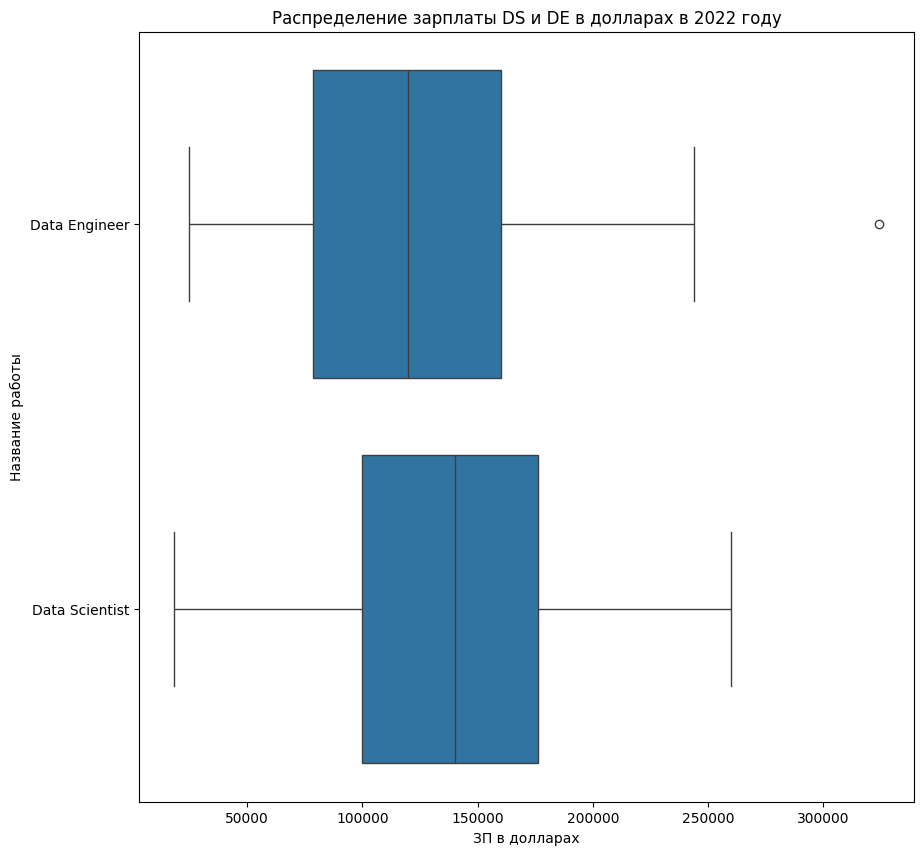

In [271]:
# Готовим данные
data_sc_en = data[((data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer'))]

# Строим коробчатую диаграмму 
fig = plt.figure(figsize=(10,10))
figure = sns.boxplot(data_sc_en[data_sc_en['work_year'] == 2022], x = 'salary_in_usd', y = 'job_title',orient= 'h')
figure.set_title('Распределение зарплаты DS и DE в долларах в 2022 году')
figure.set(xlabel= 'ЗП в долларах', ylabel = 'Название работы')

Видим большую зарпату у DS. Разница в ЗП равна примерно 25000 рублям. В 2022 году дата-сайнтистам оплачивали больше, чем дата инженерам. Проверим статистическую значимость этой теории

[Text(0.5, 0, 'ЗП в долларах'), Text(0, 0.5, 'Размер компании')]

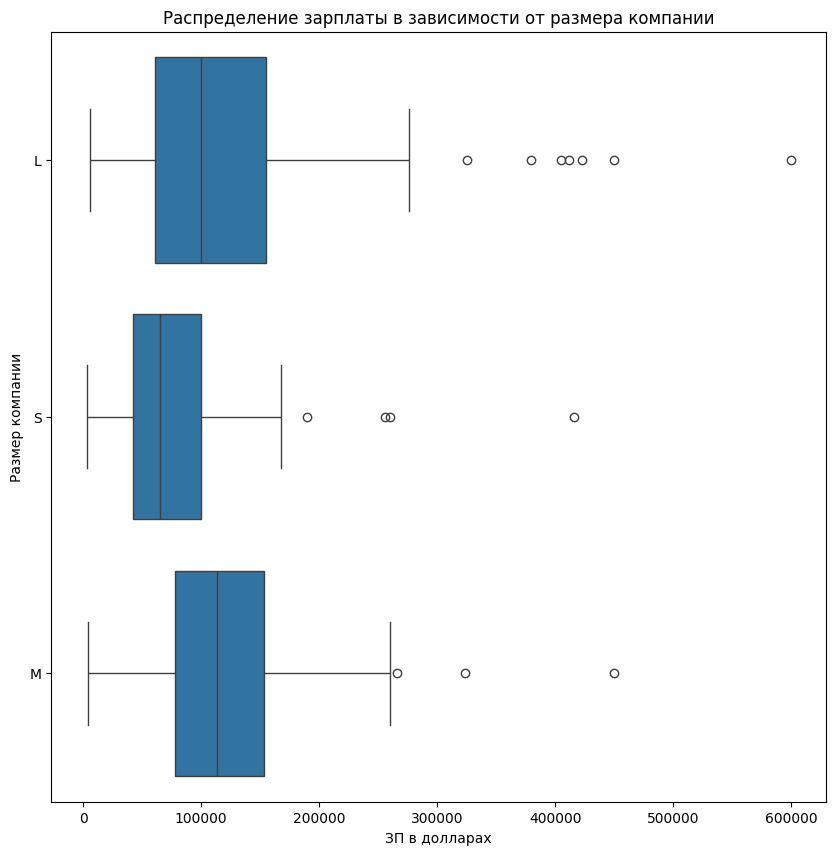

In [272]:
# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

# Строим коробчатую диаграмму
fig = plt.figure(figsize=(10,10))
figure = sns.boxplot(data, x = 'salary_in_usd', y = 'company_size', orient='h')
figure.set_title('Распределение зарплаты в зависимости от размера компании')
figure.set(xlabel= 'ЗП в долларах', ylabel = 'Размер компании')

ЗП между большой и средней компанией не наблюдается существенной разницы. Однако маленькие компании платят меньше, маленькие компании не могут себе позволить платить большие ЗП, следовательно в таких компаниях меньшее скопление опытных DS, в основном концентрация мидов и джунов; это требует отдельной проверки. Проверим статистическую значимость этой теории

## Cоотношение между должностью DS и DE и размером компании

[Text(0.5, 80.7222222222222, 'Размер компании'),
 Text(95.7222222222222, 0.5, 'Название работы')]

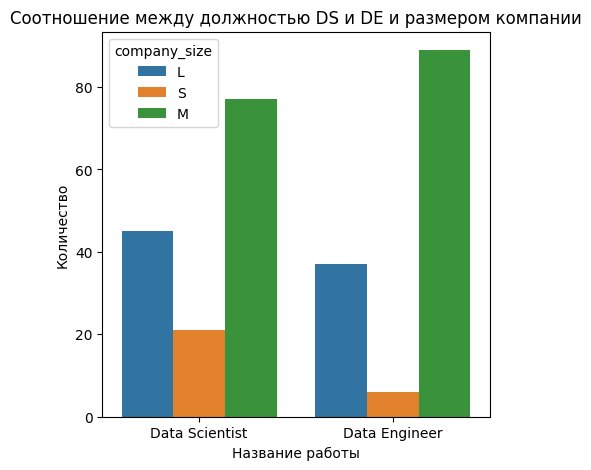

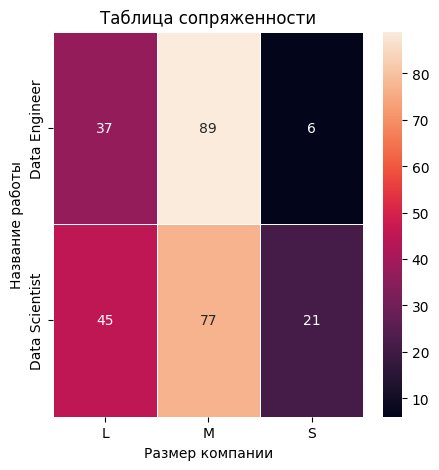

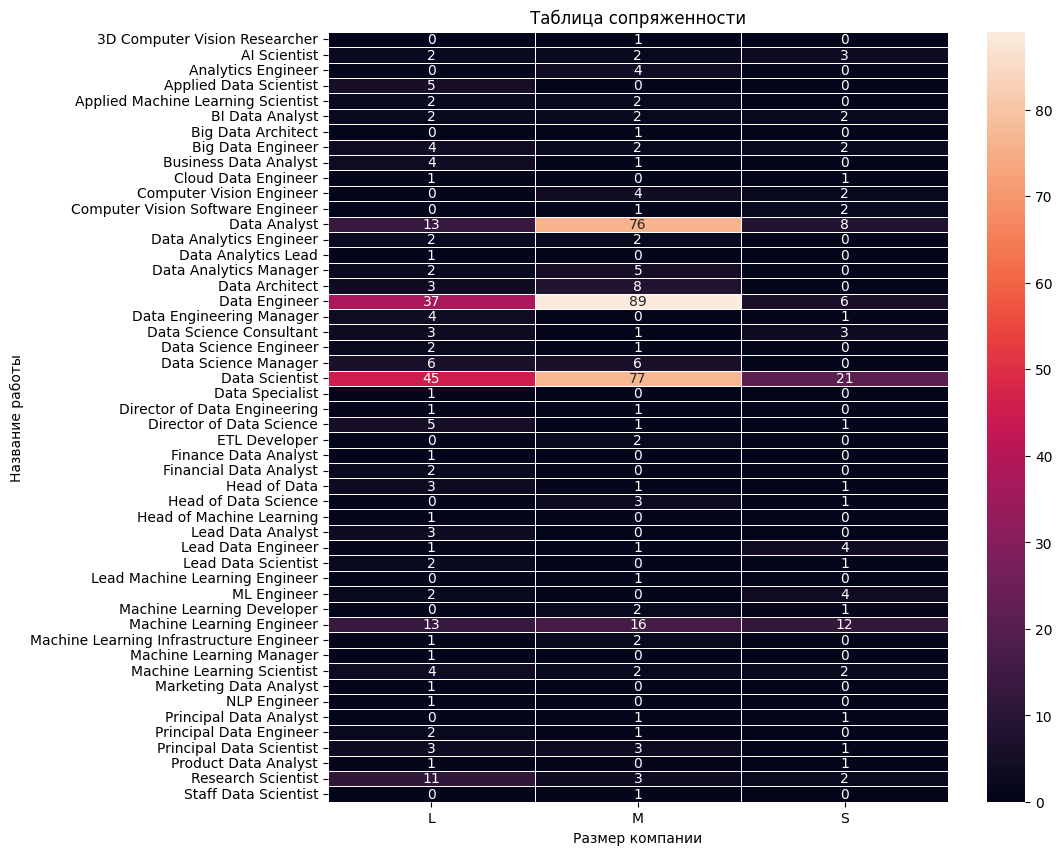

In [273]:
# Строим столбчатую диаграмму подсчета
fig = plt.figure(figsize=(5,5))
figure = sns.countplot(data_sc_en, x = 'job_title', hue = 'company_size')
figure.set_title('Cоотношение между должностью DS и DE и размером компании')
figure.set(xlabel= 'Название работы', ylabel= 'Количество')

fig = plt.figure(figsize=(5,5))
cross_tab = pd.crosstab(index = data_sc_en['job_title'], columns = data_sc_en['company_size'])
figure = sns.heatmap(cross_tab,annot=True, linewidth=.5)
figure.set_title('Таблица сопряженности')
figure.set(xlabel='Размер компании', ylabel = 'Название работы')

fig = plt.figure(figsize=(10,10))
cross_tab = pd.crosstab(index = data['job_title'], columns = data['company_size'])
figure = sns.heatmap(cross_tab,annot=True, linewidth=.5)
figure.set_title('Таблица сопряженности')
figure.set(xlabel='Размер компании', ylabel = 'Название работы')

Наблюдаем больше кол-во дата-сайнтистов в больших компаниях, большее скопление дата-инженеров в средней компании, и по одному специалисту каждого типа в маленьких компаниях. Проверим статистическую значимость этой теории

# Статистические тесты

In [274]:
# функция для принятия решения о нормальности
def decision_normality(p, *string):
    print('Проводим тест на равентсво диспресий')
    
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))
    


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

# Что влияет на ЗП DS?

## Влияет ли опыт работы на зп DS?

**Формируем гипотезы**

h1 - Entry-level/Junior; h2 - Mid-level/Intermediate; h3 - Senior-level/Expert

Нулевая гипотеза(H0): Опыт работы не влияет на зп DS (h1 >= h2 >= h3)


Альтернативная гипотеза(H1): Наблюдается ежегодный рост зарплат у специалистов Data Scientist (h1 < h2 < h3)

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

Проверка на нормальность зп DS c уровнем Junior
Проводим тест на равентсво диспресий
p-value = 0.174
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка на нормальность зп DS c уровнем Intermediate
Проводим тест на равентсво диспресий
p-value = 0.178
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка на нормальность зп DS c уровнем Expert
Проводим тест на равентсво диспресий
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


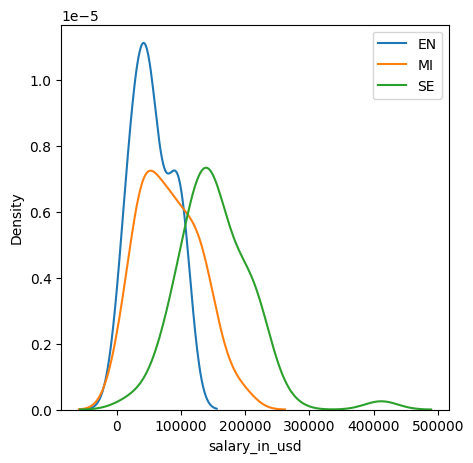

In [300]:
# Проверка на нормальность зп DS c уровнем Junior
print('Проверка на нормальность зп DS c уровнем Junior')
x = stats.shapiro(data_sc[data_sc['experience_level'] == 'EN']['salary_in_usd'])
decision_normality(x[1])

# Проверка на нормальность зп DS c уровнем Intermediate
print('Проверка на нормальность зп DS c уровнем Intermediate')
x = stats.shapiro(data_sc[data_sc['experience_level'] == 'MI']['salary_in_usd'])
decision_normality(x[1])

# Проверка на нормальность зп DS c уровнем Intermediate
print('Проверка на нормальность зп DS c уровнем Expert')
x = stats.shapiro(data_sc[data_sc['experience_level'] == 'SE']['salary_in_usd'])
decision_normality(x[1])

figure = plt.figure(figsize=(5, 5))
sns.kdeplot(data_sc[data_sc['experience_level'] == 'EN']['salary_in_usd'], hue_order= data_sc['experience_level'], label = 'EN')
sns.kdeplot(data_sc[data_sc['experience_level'] == 'MI']['salary_in_usd'], hue_order= data_sc['experience_level'], label = 'MI')
sns.kdeplot(data_sc[data_sc['experience_level'] == 'SE']['salary_in_usd'], hue_order= data_sc['experience_level'], label = 'SE')
plt.legend()

**Подбираем тест**

Тип признака 'Зарплата':Количественный

Кол-во сравниваемых групп: 3

Группы зависимы : Да

Признак распределен по нормальному закону: Нет

Выбор теста: Критерий Фридмана

In [276]:
# Готовим данные для теста 
data_juniour = data_sc[data_sc['experience_level'] == 'EN']['salary_in_usd']
data_intermediate = data_sc[data_sc['experience_level'] == 'MI']['salary_in_usd']
data_expert = data_sc[data_sc['experience_level'] == 'SE']['salary_in_usd']
p = stats.kruskal(data_juniour, data_intermediate, data_expert)
decision_hypothesis(p[1])

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Делаем вывод, что опыт работы влияет на зп дата-сайнтиста 

## Влияет ли объем работы выполняемой удаленно на зп DS?

**Формируем гипотезы**

h1 - 0$; h2 - 50%; h3 - 100%

Нулевая гипотеза(H0): ЗП DS не растет по мере роста объема работы выполняемой удаленно (h1 >= h2 >= h3)


Альтернативная гипотеза(H1): ЗП DS растет по мере роста объема работы выполняемой удаленно(h1 < h2 < h3)

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [277]:
# Проверка на нормальность зп DS c объемом удаляемой работы равный 0%
print('Проверка на нормальность зп DS c объемом удаляемой работы равный 0%')
x = stats.shapiro(data_sc[data_sc['remote_ratio'] == 0]['salary_in_usd'])
decision_normality(x[1])

# Проверка на нормальность зп DS c объемом удаляемой работы равный 50%
print('Проверка на нормальность зп DS c объемом удаляемой работы равный 0%')
x = stats.shapiro(data_sc[data_sc['remote_ratio'] == 50]['salary_in_usd'])
decision_normality(x[1])

# Проверка на нормальность зп DS c объемом удаляемой работы равный 100%
print('Проверка на нормальность зп DS c объемом удаляемой работы равный 0%')
x = stats.shapiro(data_sc[data_sc['remote_ratio'] == 100]['salary_in_usd'])
decision_normality(x[1])

Проверка на нормальность зп DS c объемом удаляемой работы равный 0%
Проводим тест на равентсво диспресий
p-value = 0.363
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка на нормальность зп DS c объемом удаляемой работы равный 0%
Проводим тест на равентсво диспресий
p-value = 0.482
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка на нормальность зп DS c объемом удаляемой работы равный 0%
Проводим тест на равентсво диспресий
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Подбираем тест**

Тип признака 'Зарплата':Количественный

Кол-во сравниваемых групп: 3

Группы зависимы : Да

Признак распределен по нормальному закону: Нет

Выбор теста: Критерий Фридмана

In [278]:
# Готовим данные для теста 
data_juniour = data_sc[data_sc['experience_level'] == 'EN']['salary_in_usd']
data_intermediate = data_sc[data_sc['experience_level'] == 'MI']['salary_in_usd']
data_expert = data_sc[data_sc['experience_level'] == 'SE']['salary_in_usd']
p = stats.kruskal(data_juniour, data_intermediate, data_expert)
decision_hypothesis(p[1])

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


# Ключевые вопросы HR - агентсва

## Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Формируем гипотезы**

h1 - 2020 год; h2 - 2021 год; h3 - 2022 год

Нулевая гипотеза(H0): Ежегодный рост зарплат у специалистов Data Scientist не наблюдается (h1 >= h2 >= h3)


Альтернативная гипотеза(H1): Наблюдается ежегодный рост зарплат у специалистов Data Scientist (h1 < h2 < h3)

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [279]:
# Проверка на нормальность 2020 год
print('Проверка на нормальность 2020 год')
x = stats.shapiro(data_sc[data_sc['work_year'] == 2020]['salary_in_usd'])
decision_normality(x[1])

# Проверка на нормальность 2021 год
print('Проверка на нормальность 2021 год')
x = stats.shapiro(data_sc[data_sc['work_year'] == 2021]['salary_in_usd'])
decision_normality(x[1])

# Проверка на нормальность 2022 год
print('Проверка на нормальность 2022 год')
x = stats.shapiro(data_sc[data_sc['work_year'] == 2022]['salary_in_usd'])
decision_normality(x[1])

Проверка на нормальность 2020 год
Проводим тест на равентсво диспресий
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Проверка на нормальность 2021 год
Проводим тест на равентсво диспресий
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка на нормальность 2022 год
Проводим тест на равентсво диспресий
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Подбираем тест**

Тип признака 'Ежегодный рост зарплат':Количественный

Кол-во сравниваемых групп: 3

Группы зависимы : Да

Признак распределен по нормальному закону: Нет

Выбор теста: Критерий Фридмана

In [280]:
# Проводим тест
# data_y_20 = list(data_sc[data_sc['work_year'] == 2020]['salary_in_usd'])
# data_y_21 = list(data_sc[data_sc['work_year'] == 2021]['salary_in_usd'])
# data_y_22 = list(data_sc[data_sc['work_year'] == 2022]['salary_in_usd'])

# Готовим данные с DS
data_sc = data[(data['job_title'] == 'Data Science') | (data['job_title'] == 'Data Scientist')]

data_y_20 = data_sc[data_sc['work_year'] == 2020]['salary_in_usd']
data_y_21 = data_sc[data_sc['work_year'] == 2021]['salary_in_usd']
data_y_22 = data_sc[data_sc['work_year'] == 2022]['salary_in_usd']
p = stats.kruskal(data_y_20, data_y_21, data_y_22)
decision_hypothesis(p[1])

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Гипотеза подтверждена: Наблюдается ежегодный рост зарплат у DS
Проведем доп тест чтобы проверить растет ли ЗП у DE

In [281]:
data_en = data[data['job_title'] == 'Data Engineer']
data_y_20 = data_en[data_en['work_year'] == 2020]['salary_in_usd']
data_y_21 = data_en[data_en['work_year'] == 2021]['salary_in_usd']
data_y_22 = data_en[data_en['work_year'] == 2022]['salary_in_usd']
p = stats.kruskal(data_y_20, data_y_21, data_y_22)
decision_hypothesis(p[1])

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


Ежегодно зарплата растет и у DE, следовательно спрос растет не только на DS. Нужны доп тесты

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?


**Формируем гипотезы**

Используя визуализацию обнаружили , что возможна теория более высокой зарплаты DS, в сравнении с DE. Эту теорию и проверим

h1 - ЗП DS;  h2 - ЗП DE

Нулевая гипотеза(H0): Зарплата DS меньше либо равна зарплате DE в 2022 году (h1 <= h2)


Альтернативная гипотеза(H1): В 2022 году зарплата DS превышает зарплату DE (h1 > h2)

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [282]:
# Проверка данных на нормальность группы DS
print('Проверка данных на нормальность группы DS')
x = stats.shapiro(data_sc[data_sc['work_year'] == 2022]['salary_in_usd'])
decision_normality(x[1])

# Проверка данных на нормальность группы DE
print('Проверка данных на нормальность группы DE')
data_en = data[data['job_title'] == 'Data Engineer']
x = stats.shapiro(data_en[data_en['work_year'] == 2022]['salary_in_usd'])
decision_normality(x[1])


Проверка данных на нормальность группы DS
Проводим тест на равентсво диспресий
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка данных на нормальность группы DE
Проводим тест на равентсво диспресий
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Подбираем тест**

Тип признака 'Зарплата в 2022 году':Количественный

Кол-во сравниваемых групп: 2

Группы зависимы : Нет

Признак распределен по нормальному закону: Нет

Выбор теста: U-критерий Манна — Уитни

In [283]:
# Строим группы 
data_sc_22 = data_sc[data_sc['work_year'] == 2022]['salary_in_usd']
data_en_22 = data_en[data_en['work_year'] == 2022]['salary_in_usd']
p = stats.mannwhitneyu(data_sc_22, data_en_22)
decision_hypothesis(p[1])

p-value = 0.155
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Зарплата DS не превышает зарплату DE в 2022 году

## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Формируем гипотезы**


h1 - S;  h2 - M; h3 - L

Нулевая гипотеза(H0): Зарплата DS выше в соответствии с размером компании (h1 > h2 > h3)


Альтернативная гипотеза(H1): Зарплата DS меньше либо не отличается в соответствии с размером компании (h1 <= h2 <= h3)

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [284]:
# Проверка данных на нормальность компании S размера
print('Проверка данных на нормальность компании S размера')
x = stats.shapiro(data_sc[data_sc['company_size'] == 'S']['salary_in_usd'])
decision_normality(x[1])

# Проверка данных на нормальность компании М размера
print('Проверка данных на нормальность компании М размера')
x = stats.shapiro(data_sc[data_sc['company_size'] == 'M']['salary_in_usd'])
decision_normality(x[1])

# Проверка данных на нормальность компании L размера
print('Проверка данных на нормальность компании L размера')
x = stats.shapiro(data_sc[data_sc['company_size'] == 'L']['salary_in_usd'])
decision_normality(x[1])



Проверка данных на нормальность компании S размера
Проводим тест на равентсво диспресий
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка данных на нормальность компании М размера
Проводим тест на равентсво диспресий
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Проверка данных на нормальность компании L размера
Проводим тест на равентсво диспресий
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Подбираем тест**

Тип признака 'Зарплата специалистов':Количественный

Кол-во сравниваемых групп: 3

Группы зависимы : Да

Признак распределен по нормальному закону: Нет

Выбор теста: U-критерий Манна — Уитни

In [313]:
# Составляем группы
company_S = data_sc[data_sc['company_size'] == 'S']['salary_in_usd'].to_frame()
company_M = data_sc[data_sc['company_size'] == 'M']['salary_in_usd'].to_frame()
company_L = data_sc[data_sc['company_size'] == 'L']['salary_in_usd'].to_frame()
# p = stats.friedmanchisquare(company_S, company_M, company_L)
# decision_hypothesis(p[1])

for x in company_S:
    if len(company_S) < 48:
        company_S.extend(company_S.mean())
    else:
        break

for x in company_M:
    if len(company_M) < 48:
        company_M.extend(company_M.mean())
    else:
        break

for x in company_L:
    if len(company_L) < 48:
        company_L.extend(company_L.mean())
    else:
        break
display(len(company_L), len(company_M), len(company_S))

AttributeError: 'DataFrame' object has no attribute 'extend'

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?